In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stat

In [14]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors

In [15]:
import scipy.optimize as optimize
import scipy.special as sp

In [16]:
import random as rand
import math
import copy as deepcopy
import copy

In [17]:
import scipy.integrate as integrate

In [18]:
import time

In [19]:
np.random.seed(12345678)

In [97]:
dfx = pd.read_csv('../data_b.csv',keep_default_na=True)
df4 = dfx.iloc[:,7:]
df4.columns = ['role','demo','name','surname','employer','job','Q1',\
             'Q2','Q3','Q4','Q5a','Q5b','Q5c','Cq5','Q6a','Q6b',
             'Q6c','Cq6','Q7a','Q7b','Q7c','Q8a','Q8b','Q8c',
             'Cq7-8','Q9a','Q9b','Q9c','Q10a','Q10b','Q10c',
             'Cq9-10','Q11','Q12','Q13','Cq11-13','expert']
experts = df4.expert
demo = df4.demo
roles = df4.role
demo = np.asarray(demo)
roles = np.asarray(roles)
role = np.zeros(demo.shape[0]+1)
region = np.zeros(demo.shape[0]+1)
gender = np.zeros(demo.shape[0]+1)
experts = np.asarray(experts)
expert = np.zeros(demo.shape[0]+1)
for i in range(0,demo.shape[0]-1):
    try:
        vals = demo[i+1].split(',')
        #print (vals)
        if vals[0] == 'EU':
            region[i+1] = 0
        elif vals[0] == 'A':
            region[i+1] = 1
        elif vals[0] == 'NA':
            region[i+1] = 2
        elif vals[0] == 'O':
            region[i+1] = 3
        elif vals[0] == 'X':
            region[i+1] = -1
        elif vals[0] == 'SA':
            region[i+1] = 3
        elif vals[0] == 'AR':
            region[i+1] = 3
        else:
            region[i+1] = -1
            #print(vals[0])
        try:
            if vals[1] == 'f':
                gender[i+1] = 0
            else:
                gender[i+1] = 1
        except:
            gender[i+1] = 1
    except:
        region[i+1] = -1
        gender[i+1] = 1
    if roles[i+1] == 'phd': #grad student
        role[i+1] = 0
    elif roles[i+1] == 'prof': #academic
        role[i+1] = 1
    elif roles[i+1] == 'r': #industry research
        role[i+1] = 2
    elif roles[i+1] == 'eng': #industry engineer
        role[i+1] = 3
    elif roles[i+1] == 'exec': #industry executive
        role[i+1] = 4
    elif roles[i+1] == 'f': #founder
        role[i+1] = 5
    elif roles[i+1] == 'x':
        role[i+1] = 6
    else: role[i+1] = 6   
    if experts[i+1] == 'x' or experts[i+1] == 'na':
        expert[i+1] = -1
    else:
        expert[i+1] = 1
region_df = pd.DataFrame(region)
gender_df = pd.DataFrame(gender)
role_df = pd.DataFrame(role)
df4['region'] = region_df
df4['gender'] = gender_df
df4['role'] = role_df

In [98]:
df4['conf'] = df4.index
df4.conf[df4.index > 57] = 0
df4.conf[df4.index <= 57] = 1

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [99]:
df4 = df4.dropna(subset=['name','surname','employer','job'])
df4 = df4[df4.iloc[:,-7].isnull() == False]

In [100]:
df4.shape

(165, 40)

In [101]:
xhlai = df4[df4.index <= 57]
xijcai = df4[df4.index > 57]

In [116]:
pcolors = ['lightskyblue', 'lightcoral', 'lavender', 'orchid','yellowgreen', 'paleturquoise', 'gold']

# Conference attendance

0    119
1     46
Name: conf, dtype: int64


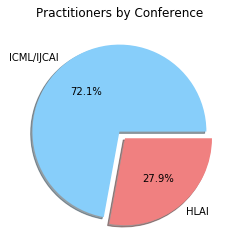

In [117]:
print(df4.conf.value_counts())
labels = 'ICML/IJCAI', 'HLAI'
explode = (0.0, 0.1)
plt.pie(df4.conf.value_counts(), colors=pcolors, labels=labels,
       explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Practitioners by Conference')
plt.savefig('Practitioners-by-conference.png')
plt.show()

# HLAI participant info

1.0    42
0.0     4
Name: gender, dtype: int64


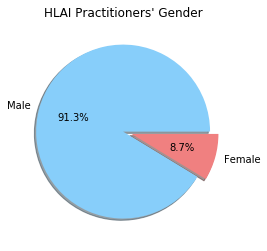

In [118]:
print(xhlai.gender.value_counts())
labels = 'Male', 'Female'
explode = (0.0, 0.1)
plt.pie(xhlai.gender.value_counts(), colors=pcolors, labels=labels,
       explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('HLAI Practitioners\' Gender')
plt.savefig('HLAI-gender.png')
plt.show()

 0.0    25
-1.0    13
 1.0     7
 2.0     1
Name: region, dtype: int64


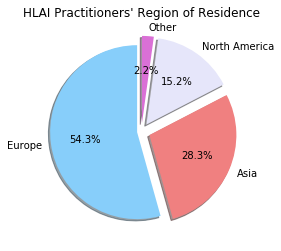

In [119]:
print(xhlai.region.value_counts())
labels = 'Europe','Asia','North America','Other'
explode = (0.05, 0.1, 0.1, 0.1)
plt.pie(xhlai.region.value_counts(), colors=pcolors, shadow=True, 
        startangle=90, labels=labels, explode=explode, autopct='%1.1f%%')
plt.title('HLAI Practitioners\' Region of Residence')
plt.savefig('HLAI-regions-of-residence.png')
plt.show()

2.0    14
3.0    10
1.0     7
5.0     6
4.0     4
0.0     3
6.0     2
Name: role, dtype: int64


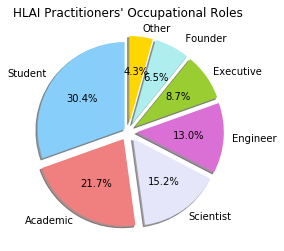

In [120]:
print(xhlai.role.value_counts())
labels = 'Student','Academic','Scientist',\
    'Engineer','Executive','   Founder','Other'
explode = (0.05,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(xhlai.role.value_counts(), colors=pcolors, shadow=True,
       startangle=90, labels=labels, explode=explode, autopct='%1.1f%%')
plt.title('HLAI Practitioners\' Occupational Roles')
plt.savefig('HLAI-occupational-roles.png')
plt.show()

# IJCAI/ICML

1.0    108
0.0     11
Name: gender, dtype: int64


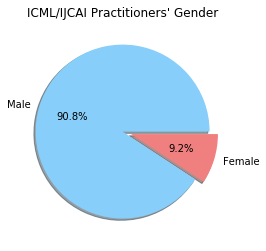

In [121]:
print(xijcai.gender.value_counts())
labels = 'Male', 'Female'
explode = (0.0, 0.1)
plt.pie(xijcai.gender.value_counts(), colors=pcolors, labels=labels,
       explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('ICML/IJCAI Practitioners\' Gender')
plt.savefig('ICML-gender.png')
plt.show()

 0.0    66
 1.0    29
-1.0    20
 3.0     4
Name: region, dtype: int64


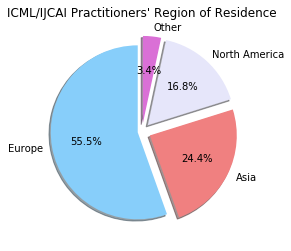

In [122]:
print(xijcai.region.value_counts())
labels = 'Europe','Asia','North America','Other'
explode = (0.05, 0.1, 0.1, 0.1)
plt.pie(xijcai.region.value_counts(), colors=pcolors, shadow=True, 
        startangle=90, labels=labels, explode=explode, autopct='%1.1f%%')
plt.title('ICML/IJCAI Practitioners\' Region of Residence')
plt.savefig('ICML-region-of-residence.png')
plt.show()

0.0    40
1.0    30
2.0    27
6.0     7
3.0     7
4.0     6
5.0     2
Name: role, dtype: int64


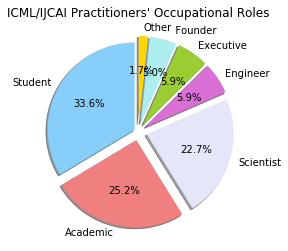

In [123]:
print(xijcai.role.value_counts())
labels = 'Student','Academic','Scientist',\
    'Engineer','Executive','   Founder','Other'
explode = (0.05,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(xijcai.role.value_counts(), colors=pcolors, shadow=True,
       startangle=90, labels=labels, explode=explode, autopct='%1.1f%%')
plt.title('ICML/IJCAI Practitioners\' Occupational Roles')
plt.savefig('ICML-occupational-roles.png')
plt.show()

In [124]:
print(xhlai.shape)
print(xijcai.shape)

(46, 40)
(119, 40)
